<a href="https://colab.research.google.com/github/Sahilkumar098/Case-Study1/blob/master/Case_Study_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The files for the case Study were uploaded on the github in order to avoid uploading all file everytime the kernel is restarted. The Below cell is used to clone the entire repository and make the file available for anaylsis.
**The Link to repository is:** 
github.com/Sahilkumar098/Case-Study1

In [140]:
# Clone the entire repo.
!git clone -l -s git://github.com/Sahilkumar098/Case-Study1.git Case_Study-1
%cd Case_Study-1
!ls

Cloning into 'Case_Study-1'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 11 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (11/11), 5.93 MiB | 9.16 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/Case_Study-1/Case_Study-1/Case_Study-1
 companies.txt	'mapping - mapping.csv'   README.md  'rounds2 - rounds2.csv'


The files are read and converted to dataFrame: **mapping, rounds2, company**.

The company.txt file contained space seperated data rather than a default comma(','). The python engine was used because it is more efficient than c engine for large files in general and is also more feature complete. 

In [0]:
mapping=pd.read_csv('/content/Case_Study-1/mapping - mapping.csv',engine='python')
rounds2=pd.read_csv('/content/Case_Study-1/rounds2 - rounds2.csv',engine='python')
company=pd.read_csv('/content/Case_Study-1/companies.txt',sep='\t',engine='python')        

Here in **company** dataframe there are few replacement characters which are shown as �.

In [142]:
company

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/ÁEron,ÁERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/ÔAsys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


# **CheckPoint 1:** _$Data$ $Cleaning_1$_

In [143]:
print(company.shape, rounds2.shape, mapping.shape)

(66368, 10) (114949, 6) (688, 10)


If you look at the **Row 66365-67 in company** and **114946-48 in rounds2's rows** you can clearly see that their the values have been tampered with or been corrupted.

In [144]:
rounds2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/銇eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/脭ASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


From the above table we can clearly see **114945 and 114944** are of the same company. so lets check for unique value from the table.


In [145]:
len(rounds2.company_permalink.unique())

90247

But pyhton is case sensitive, so we need to convert all the company_permalink to lowercase to check for accurate unique permalinks


In [146]:
len(rounds2.company_permalink.str.lower().unique())                 #UNique companies in rounds2

66373

In [147]:
company

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/ÁEron,ÁERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/ÔAsys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


To find the Total number of unique companies in *company* DataFrame.

In [148]:
len(company.permalink.str.lower().unique())                         #Unique companies in company df

66368

In [149]:
len(company.name.str.lower().unique())                              #Unique company names in the df

66038

Now, here is a delima. The above cell shows that there are 330 companies that have different permalink but same name.

As companies can have same names we will consider **company_permalink** as the measure to identify each company uniquely.

Now we have observed that the files are having special characters, which are not readable. Hence, we will remove those characters from the dataframe to compare it on same characters. **And hence have a reliable anaylsis**


**In order to find the companies name in rounds2 but not in company.**

In [0]:
company['permalink'] = company['permalink'].str.encode('ascii','ignore').str.decode('ascii','ignore')
rounds2['company_permalink'] = rounds2['company_permalink'].str.encode('ascii','ignore').str.decode('ascii','ignore') 

company.permalink=company.permalink.str.lower()
rounds2['permalink']=rounds2.company_permalink.str.lower()

In [151]:
len(rounds2[~rounds2.permalink.isin(company.permalink)])             #number of the rows in rounds2 that were not present in the company

5

Here we see that there are **6** companies that are present in rounds2 but not in company.

Now merging the two DataFrames in such a way that, all the columns of company is added to rounds2 DataFrame and we name the resulting DataFrame as **master_frame**. Hence, we will do an inner join in order to remove those companies that are not present in both tables.
The final rows must be 114949-6 = **114943**


In [0]:
master_frame=pd.merge(rounds2,company,how='inner',on='permalink')        #Master_frame containing all data of rounds2 and company

In [153]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [154]:
master_frame.shape

(114944, 16)

The shape of master_frame is **( 114943 , 16 )**. As expected.



# **CheckPoint 2:** _$Funding $    $ Type $ $ Analysis $_

Let's first try to clean the data.

In [155]:
round(master_frame.isnull().sum()/len(master_frame.index)*100,2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

Now we need to drop the raised amount column cell's whose values are null.

In [0]:
master_frame.drop(master_frame[master_frame.raised_amount_usd.isnull()].index,inplace=True)
master_frame.drop('funding_round_code', axis=1,inplace=True)
master_frame.drop('founded_at', axis=1,inplace=True)
master_frame.drop('homepage_url', axis=1,inplace=True)

In [157]:
master_frame.shape

(94956, 13)

In [158]:
master_frame.country_code

0         IND
2         USA
3         NaN
4         CHN
6         HKG
         ... 
114938    HRV
114939    HRV
114940    HRV
114942    USA
114943    NaN
Name: country_code, Length: 94956, dtype: object

In [159]:
round(master_frame.isnull().sum()/len(master_frame.index)*100,2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
category_list              1.10
status                     0.00
country_code               6.16
state_code                 8.01
region                     7.42
city                       7.42
dtype: float64

Here a lot of data is dropped but will help in improving the quality of analysis.

Hence now we Will find the mean investment in each of the company categories.

In [160]:
round(master_frame.groupby('funding_round_type').raised_amount_usd.mean()/1000000,2)

funding_round_type
angel                      0.96
convertible_note           1.45
debt_financing            17.04
equity_crowdfunding        0.54
grant                      4.30
non_equity_assistance      0.41
post_ipo_debt            168.70
post_ipo_equity           82.18
private_equity            73.31
product_crowdfunding       1.36
secondary_market          79.65
seed                       0.72
undisclosed               19.24
venture                   11.75
Name: raised_amount_usd, dtype: float64

Among all the category only the **Venture** seems to be in the range of **5-15M** usd for investment.
But it might not be the best option. So we need to look for the categories with most investment done in the range of **5M - 15M**. lets investigate.

In [161]:
(master_frame[(master_frame['raised_amount_usd'] >= 5000000) & (master_frame['raised_amount_usd'] <= 15000000)].groupby('funding_round_type').count()).sort_values(by = 'raised_amount_usd', ascending = False)

,company_permalink,funding_round_permalink,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city
funding_round_type,,,,,,,,,,,,
venture,16598,16598,16598,16598,16598,16598,16399,16598,15895,15656,15711,15711
debt_financing,870,870,870,870,870,870,864,870,850,843,846,846
private_equity,429,429,429,429,429,429,424,429,406,399,400,402
undisclosed,226,226,226,226,226,226,222,226,193,183,182,182
seed,203,203,203,203,203,203,200,203,189,184,187,187
grant,173,173,173,173,173,173,160,173,169,168,168,168
post_ipo_equity,152,152,152,152,152,152,150,152,147,147,146,146
angel,72,72,72,72,72,72,72,72,68,65,66,66
convertible_note,48,48,48,48,48,48,48,48,47,47,47,47


In [162]:
(master_frame[(master_frame['raised_amount_usd'] >= 5000000) & (master_frame['raised_amount_usd'] <= 15000000)].groupby('funding_round_type').mean()/1000000).sort_values(by = 'raised_amount_usd', ascending = False)

,raised_amount_usd
funding_round_type,
non_equity_assistance,15.000000
post_ipo_equity,9.324945
private_equity,9.283496
product_crowdfunding,9.158713
venture,8.888551
post_ipo_debt,8.793382
grant,8.546105
undisclosed,8.499421
debt_financing,8.283572


From the above table you can see that **post_ip_equity** id having the highest mean investement in our range. But very few of investers have invested in the company.But **private_equilty** has a large amount of investors and seems to be more reliable than above mentioned.
So, in order have 

**Hence, the companies that Sparks fund should invest in the venture if it wants more reliablity but invest in Private_equity  for highest amount investement  with decently reliable company category**.

# **CheckPoint 3:** _$Country$      $Analysis$_

Here we create a new Data Frame named top9 to find out the **top9** countries with highest fundings received.

In [0]:
top9 = pd.DataFrame(master_frame[master_frame['funding_round_type'] == 'venture'].groupby('country_code').raised_amount_usd.sum()/(10**6)).sort_values(by = 'raised_amount_usd', ascending = False)[:9]
# (master_frame[master_frame.funding_round_type=='venture']).groupby('country_code').head()

In [164]:
top9

,raised_amount_usd
country_code,
USA,422510.842796
CHN,39835.418773
GBR,20245.627416
IND,14391.858718
CAN,9583.332317
FRA,7259.536732
ISR,6907.514579
DEU,6346.959822
JPN,3363.676611


The top 3 englisg speaking country with highest investment are: USA, GBR,IND



<!--  -->

# **CheckPoint 4:** _$Sector$ $Analysis_1$_

**WE now narrow down our data to only those countries where the most fundings in venture category have occured around the world.**

In [165]:
top9_df=master_frame[master_frame.country_code.isin(list(top9.index))]
top9_df=top9_df[top9_df.funding_round_type.isin(['venture'])]
top9_df

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View
11,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114917,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14219999.0,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,MO,MO - Other,Fremont
114918,/ORGANIZATION/ZYOMYX-INC,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,29-01-2010,555016.0,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,MO,MO - Other,Fremont
114929,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.0,/organization/zyrra,Zyrra,E-Commerce,operating,USA,MA,Boston,Cambridge
114931,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,16-12-2004,8500000.0,/organization/zystor,Zystor,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee


If we look at the **category_list** column in the data it has multiple category. We need to reduce that to one category for each company. 

In [0]:
top9_df['primary_sector']=top9_df.category_list.str.split("|",n=2,expand=True)[[0]]

In [167]:
top9_df

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,Media
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,Curated Web
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,Biotechnology
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics
11,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114917,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14219999.0,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,MO,MO - Other,Fremont,Biotechnology
114918,/ORGANIZATION/ZYOMYX-INC,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,29-01-2010,555016.0,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,MO,MO - Other,Fremont,Biotechnology
114929,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.0,/organization/zyrra,Zyrra,E-Commerce,operating,USA,MA,Boston,Cambridge,E-Commerce
114931,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,16-12-2004,8500000.0,/organization/zystor,Zystor,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,Biotechnology


According to the problem statement, we have to associate **main sectors** of each company from mapping DataFrame.

And also we find that the **category_list** data have defects in which 'na' is replaced by '0'. We need to correct that too

In [168]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


Defining the function for correcting the defect of data

In [0]:
def correction(category):
  if '0' in category:
    if category.startswith('0'):
      return category[:category.find('0')]+'Na'+category[:category.find('0')+1:]
    elif category.endswith("0"): 
      return category
    else:
      return category[:category.find('0')]+'na'+category[category.find('0')+1:]
  else:
    return category

In [0]:
mapping=mapping[~mapping['category_list'].isnull()]

In [0]:
mapping['category_list']=mapping['category_list'].apply(correction)

Corrected data of mapping DataFrame.

In [172]:

mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


Now we need to simplify the DataFrame into 2 columns for mergin with **top9_df**. So we use the melt () to converge the DataFrame into 2 columns

In [0]:
m=pd.melt(mapping,id_vars=['category_list'], var_name=['main_sector'])          #this creates 3 columns
m=m[m.value==1]                                                                 #THis will fiter out the data
m.drop('value',axis=1,inplace=True)                                             #This will reduce the columns to 2. THat is what is needed.

In [174]:
top9_df=pd.merge(top9_df,m,how='left',left_on='primary_sector',right_on='category_list')    #we did this in order to avoid creating more column before merging
# top9_df.drop('category_list',axis=1,inplace=True)
top9_df

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,state_code,region,city,primary_sector,category_list_y,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,Media,Media,Entertainment
1,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,Curated Web,Curated Web,"News, Search and Messaging"
2,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,Biotechnology,Biotechnology,Cleantech / Semiconductors
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,Analytics,"Social, Finance, Analytics, Advertising"
4,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,Analytics,"Social, Finance, Analytics, Advertising"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44378,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14219999.0,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,MO,MO - Other,Fremont,Biotechnology,Biotechnology,Cleantech / Semiconductors
44379,/ORGANIZATION/ZYOMYX-INC,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,29-01-2010,555016.0,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,MO,MO - Other,Fremont,Biotechnology,Biotechnology,Cleantech / Semiconductors
44380,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.0,/organization/zyrra,Zyrra,E-Commerce,operating,USA,MA,Boston,Cambridge,E-Commerce,E-Commerce,Others
44381,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,16-12-2004,8500000.0,/organization/zystor,Zystor,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,Biotechnology,Biotechnology,Cleantech / Semiconductors


Here we will drop the extra columns that was imported during merging.

In [175]:
top9_df.drop('category_list_y',axis=1,inplace=True)
top9_df

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,state_code,region,city,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,Media,Entertainment
1,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,Curated Web,"News, Search and Messaging"
2,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,Biotechnology,Cleantech / Semiconductors
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,"Social, Finance, Analytics, Advertising"
4,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,"Social, Finance, Analytics, Advertising"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44378,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14219999.0,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,MO,MO - Other,Fremont,Biotechnology,Cleantech / Semiconductors
44379,/ORGANIZATION/ZYOMYX-INC,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,29-01-2010,555016.0,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,MO,MO - Other,Fremont,Biotechnology,Cleantech / Semiconductors
44380,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.0,/organization/zyrra,Zyrra,E-Commerce,operating,USA,MA,Boston,Cambridge,E-Commerce,Others
44381,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,16-12-2004,8500000.0,/organization/zystor,Zystor,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,Biotechnology,Cleantech / Semiconductors


#**CheckPoint 5:** _$Sector$ $Analysis_2$_

Here we load all the data of top3 countries into the same different dataFrames namely: **D1,D2,D3**

In [176]:
D1=top9_df[top9_df['country_code']=='USA']
D1

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,state_code,region,city,primary_sector,main_sector
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,"Social, Finance, Analytics, Advertising"
4,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,"Social, Finance, Analytics, Advertising"
5,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,"Social, Finance, Analytics, Advertising"
6,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,Apps,"News, Search and Messaging"
8,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,2520000.0,/organization/1000memories,1000memories,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,Curated Web,"News, Search and Messaging"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44377,/organization/zyomyx-inc,/funding-round/4191cb5258d3863b0212d1083881da64,venture,30-06-2013,12000000.0,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,MO,MO - Other,Fremont,Biotechnology,Cleantech / Semiconductors
44378,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14219999.0,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,MO,MO - Other,Fremont,Biotechnology,Cleantech / Semiconductors
44379,/ORGANIZATION/ZYOMYX-INC,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,29-01-2010,555016.0,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,MO,MO - Other,Fremont,Biotechnology,Cleantech / Semiconductors
44380,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.0,/organization/zyrra,Zyrra,E-Commerce,operating,USA,MA,Boston,Cambridge,E-Commerce,Others


In [177]:
D2=top9_df[top9_df['country_code']=='GBR']
D2

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,state_code,region,city,primary_sector,main_sector
7,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4000000.0,/organization/10-minutes-with,10 Minutes With,Education,operating,GBR,H9,London,London,Education,Others
123,/organization/31dover,/funding-round/b95cb5a74632e596e19a845e405ef14b,venture,01-03-2014,2274716.0,/organization/31dover,31Dover,E-Commerce|Wine And Spirits,operating,GBR,H9,London,London,E-Commerce,Others
137,/ORGANIZATION/365SCORES,/funding-round/48212f931f542fdef78810bc87aef086,venture,29-09-2014,5500000.0,/organization/365scores,365Scores,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,Android,"Social, Finance, Analytics, Advertising"
138,/organization/365scores,/funding-round/493f78ea0ca33cfac48a57b2351b154b,venture,28-01-2013,1200000.0,/organization/365scores,365Scores,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,Android,"Social, Finance, Analytics, Advertising"
197,/organization/3sun,/funding-round/f1d8c6491b45bcf2a35ef1cf5cae96c4,venture,03-03-2014,15152514.0,/organization/3sun,3sun,Clean Technology,operating,GBR,I9,NaN,NaN,Clean Technology,Cleantech / Semiconductors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44303,/ORGANIZATION/ZUBKA,/funding-round/37fbbea761f614e5a3254d314cb2eba1,venture,09-02-2007,3919186.0,/organization/zubka,Zubka,Consulting,closed,GBR,B9,NaN,NaN,Consulting,"Social, Finance, Analytics, Advertising"
44334,/ORGANIZATION/ZUTUX,/funding-round/281d898f0e2f5d0d964fbde6f3a10313,venture,16-04-2012,1503926.0,/organization/zutux,Zutux,E-Commerce|Furniture,operating,GBR,I2,Manchester,Manchester,E-Commerce,Others
44364,/organization/zyncd,/funding-round/3549f5a481f83610044a4226926acf5a,venture,01-09-2014,144451.0,/organization/zyncd,Zyncd,Crowdsourcing|Knowledge Management,operating,GBR,H9,London,London,Crowdsourcing,"Social, Finance, Analytics, Advertising"
44375,/organization/zynstra,/funding-round/05f43b37c270f5919578281ce803de8f,venture,09-07-2014,8400000.0,/organization/zynstra,Zynstra,Software,operating,GBR,A4,Bath,Bath,Software,Others


In [178]:
D3=top9_df[top9_df['country_code']=='IND']
D3

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,state_code,region,city,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,Media,Entertainment
76,/ORGANIZATION/21DIAMONDS-INDIA,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6369507.0,/organization/21diamonds-india,21Diamonds,E-Commerce,operating,IND,10,New Delhi,Gurgaon,E-Commerce,Others
90,/ORGANIZATION/247-LEARNING-PRIVATE,/funding-round/4cd5cd165bc869bc40705a9e4b626bee,venture,06-11-2007,4000000.0,/organization/247-learning-private,24x7 Learning,EdTech|Education|Systems,operating,IND,19,Bangalore,Bangalore,EdTech,Others
168,/ORGANIZATION/3DSOC,/funding-round/bbedf1410fddeed341018583bbd0ca1e,venture,01-12-2007,1240000.0,/organization/3dsoc,3DSoC,3D|Mobile,operating,IND,19,Bangalore,Bangalore,3D,Manufacturing
169,/organization/3dsoc,/funding-round/da8918e533a7caf0df0dc8d3f506c0f8,venture,01-08-2010,825000.0,/organization/3dsoc,3DSoC,3D|Mobile,operating,IND,19,Bangalore,Bangalore,3D,Manufacturing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44220,/ORGANIZATION/ZOOMCAR-INDIA,/funding-round/de560f3d008b7662d844e48fa1e467b3,venture,08-07-2015,11000000.0,/organization/zoomcar-india,ZoomCar,Automotive|Consumers|E-Commerce|Transportation,operating,IND,19,Bangalore,Bangalore,Automotive,Automotive & Sports
44231,/organization/zoomo,/funding-round/473111947c0915402be71b8b61ec62f6,venture,02-07-2015,5000000.0,/organization/zoomo,Zoomo,Internet,operating,IND,19,Bangalore,Bangalore,Internet,"News, Search and Messaging"
44261,/ORGANIZATION/ZOPNOW,/funding-round/a0fa8c6ccaa3f11f3f0f196e03ff7449,venture,13-04-2015,10000000.0,/organization/zopnow,ZopNow,Groceries|Logistics,operating,IND,19,Bangalore,Bangalore,Groceries,Manufacturing
44262,/organization/zopper,/funding-round/aa92ee11012093420448630238e66a96,venture,04-06-2015,20000000.0,/organization/zopper,Zopper,Mobile,operating,IND,36,New Delhi,Noida,Mobile,"News, Search and Messaging"


The total number of investment done in USA

## USA based analysis

To find the count of investment done in usa in our preffered range

In [179]:
D1=D1[(D1['raised_amount_usd']>=5000000) & (D1['raised_amount_usd']<=15000000) ]
D1.shape

(12150, 15)

Total investment

In [180]:
D1.raised_amount_usd.sum()

108531347515.0

Next 3 cells have to analysis of top 3 sector in the country.

In [181]:
D1.groupby('main_sector').raised_amount_usd.count().sort_values(ascending=False).head()

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2300
News, Search and Messaging                 1582
Health                                      909
Name: raised_amount_usd, dtype: int64

In [182]:
D1[D1['main_sector']=='Others'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector  permalink                        
Others       /organization/virtustream            64300000.0
             /organization/capella                54968051.0
             /organization/airtight-networks      54201907.0
             /organization/decarta                52100000.0
             /organization/black-duck-software    51000000.0
Name: raised_amount_usd, dtype: float64

In [183]:
D1[D1['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                              permalink                
Social, Finance, Analytics, Advertising  /organization/shotspotter    67933006.0
                                         /organization/demandbase     63000000.0
                                         /organization/intacct        61800000.0
                                         /organization/netbase        60600000.0
                                         /organization/lotame         59700000.0
Name: raised_amount_usd, dtype: float64

In [184]:
D1[D1['main_sector']=='Cleantech / Semiconductors'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                 permalink                  
Cleantech / Semiconductors  /organization/biodesix         75300000.0
                            /organization/tigo-energy      68739496.0
                            /organization/forsight-labs    61300001.0
                            /organization/rheonix          56124758.0
                            /organization/scienergy        55375423.0
Name: raised_amount_usd, dtype: float64

## GRB based analysis

To find the count of investment done in GRB in our preffered range

In [185]:
D2=D2[(D2['raised_amount_usd']>=5000000) & (D2['raised_amount_usd']<=15000000) ]
D2.shape

(628, 15)

In [186]:
D2.raised_amount_usd.sum()

5436843539.0

In [187]:
D2.groupby('main_sector').raised_amount_usd.count().sort_values(ascending=False).head()

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 128
News, Search and Messaging                  73
Entertainment                               56
Name: raised_amount_usd, dtype: int64

Next 3 cells have to analysis of top 3 sector in the country.

In [188]:
D2[D2['main_sector']=='Others'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector  permalink                            
Others       /organization/electric-cloud             37000000.0
             /organization/sensage                    36250000.0
             /organization/enigmatic                  32500000.0
             /organization/silverrail-technologies    29000000.0
             /organization/opencloud                  27972766.0
Name: raised_amount_usd, dtype: float64

In [189]:
D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                              permalink                          
Social, Finance, Analytics, Advertising  /organization/celltick-technologies    37500000.0
                                         /organization/mythings                 34000000.0
                                         /organization/zopa                     32900000.0
                                         /organization/imagini                  28550000.0
                                         /organization/marketinvoice            25553007.0
Name: raised_amount_usd, dtype: float64

In [190]:
D2[D2['main_sector']=='Cleantech / Semiconductors'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                 permalink                                                                  
Cleantech / Semiconductors  /organization/eusa-pharma                                                      35600000.0
                            /organization/horizon-discovery                                                31353719.0
                            /organization/f-star-biotechnologische-forschungs-und-entwicklungsges-m-b-h    29132906.0
                            /organization/elixent                                                          25000000.0
                            /organization/takeda-cambridge                                                 22340000.0
Name: raised_amount_usd, dtype: float64

## IND based analysis

In [191]:
D3=D3[(D3['raised_amount_usd']>=5000000) & (D3['raised_amount_usd']<=15000000) ]
D3.shape

(330, 15)

In [192]:
D3.raised_amount_usd.sum()

2976543602.0

In [193]:
D3.groupby('main_sector').raised_amount_usd.count().sort_values(ascending=False).head()

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Name: raised_amount_usd, dtype: int64

Next 3 cells have to analysis of top 3 sector in the country.

In [194]:
D3[D3['main_sector']=='Others'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector  permalink                     
Others       /organization/firstcry-com        39000000.0
             /organization/myntra              38000000.0
             /organization/commonfloor         32900000.0
             /organization/pepperfry-com       28000000.0
             /organization/itzcash-card-ltd    25000000.0
Name: raised_amount_usd, dtype: float64

In [195]:
D3[D3['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                              permalink                               
Social, Finance, Analytics, Advertising  /organization/manthan-systems               50700000.0
                                         /organization/komli-media                   28000000.0
                                         /organization/shopclues-com                 25000000.0
                                         /organization/intarvo                       21900000.0
                                         /organization/grameen-financial-services    21556050.0
Name: raised_amount_usd, dtype: float64

In [196]:
D3[D3['main_sector']=='News, Search and Messaging'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                 permalink                                     
News, Search and Messaging  /organization/gupshup-technology-india-pvt-ltd    33000000.0
                            /organization/imimobile                           23000000.0
                            /organization/sms-gupshup                         22000000.0
                            /organization/hike                                21000000.0
                            /organization/roadrunnr                           21000000.0
Name: raised_amount_usd, dtype: float64

# **CheckPoint 6:**  _$ Plots $_

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

Here we modify the master_frame in a way to faciltate us to plot our data. 

In [0]:
x=master_frame[master_frame['funding_round_type'].isin(['venture','seed','private_equity'])]

## BAR graph

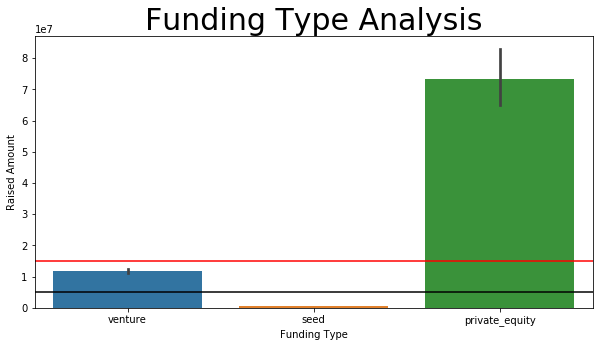

In [199]:
plt.figure(figsize=(10,5))
g=sns.barplot(x='funding_round_type', y='raised_amount_usd', data=x)
g.set(xlabel='Funding Type', ylabel='Raised Amount')
g.set_title('Funding Type Analysis',fontsize =30)
plt.axhline(5000000, color='Black')
plt.axhline(15000000, color='red')
plt.show()


PLotting the funding amount for each of the top 9 countries.

In [0]:
x=master_frame[master_frame['country_code'].isin(top9.index)]

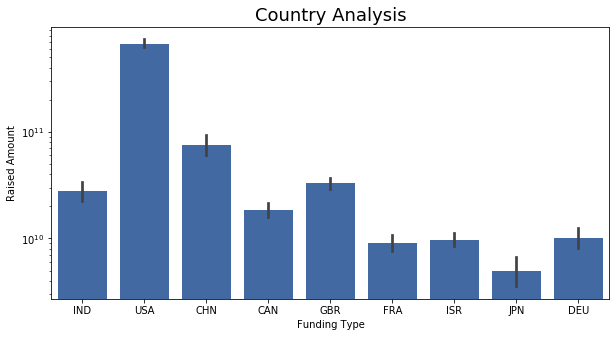

In [201]:
plt.figure(figsize=(10,5))
c=sns.barplot(x='country_code', y='raised_amount_usd', data=x, estimator=np.sum,color=(0.2, 0.4, 0.7, 0.6))
#c.set_ylim(0, 100000000000)
c.set_yscale('log')
c.set(xlabel='Funding Type', ylabel='Raised Amount')
c.set_title('Country Analysis',fontsize =18)
plt.show()

In [0]:
D=D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]
D=D.append(D2[D2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])], ignore_index=True)
D=D.append(D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])], ignore_index=True)

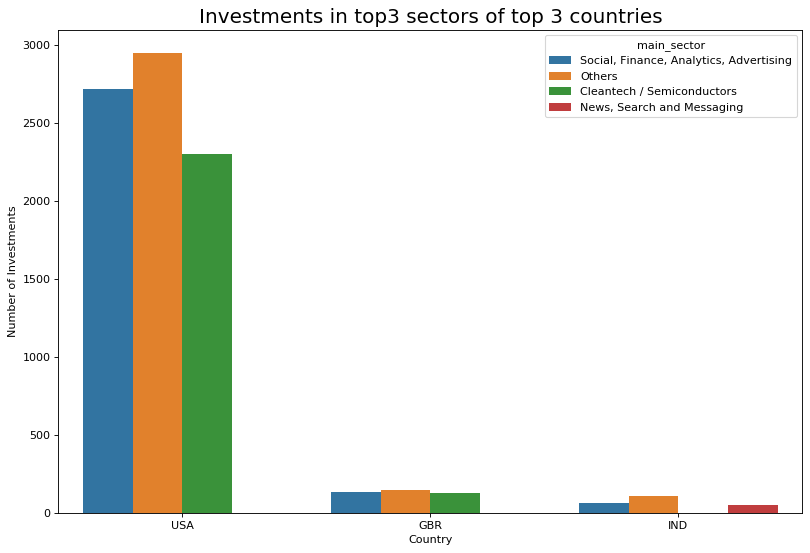

In [203]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

s=sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=D,estimator=lambda x:len(x))
s.set(xlabel='Country', ylabel='Number of Investments')
s.set_title('Investments in top3 sectors of top 3 countries',fontsize =18)
plt.show()